In [8]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot import plot_cdf
from util.consts import balance_size_bins, balance_size_bins_label

Predicted Completion Times: (100000,)


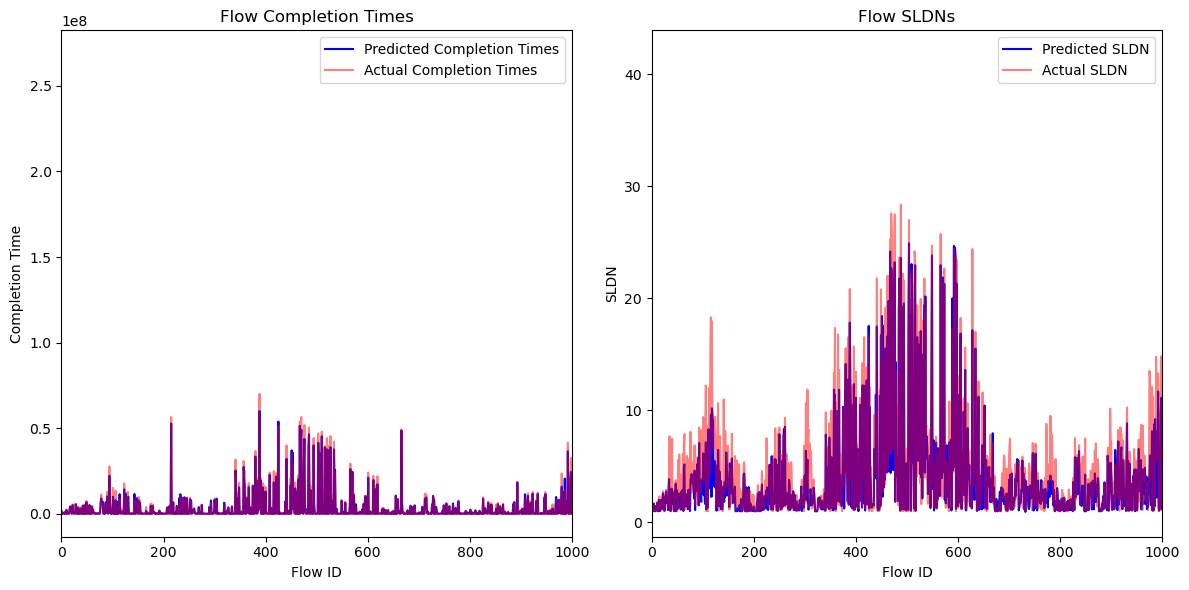

In [36]:
# Load the data from the .npz file
max_inflight_flows=0
flow_size_threshold=1000000
scenario_idx=0
empirical_str='_empirical'
# empirical_str=''
data = np.load(f'./res/inference_path_{max_inflight_flows}_t{flow_size_threshold}{empirical_str}.npz')
fct = data['fct']
sldn = data['sldn']

# Extract the data
predicted_completion_times = fct[scenario_idx, :, 0].flatten()
actual_completion_times = fct[scenario_idx, :, 1].flatten()
predicted_sldns = sldn[scenario_idx, :, 0].flatten()
actual_sldns = sldn[scenario_idx, :, 1].flatten()
print('Predicted Completion Times:', predicted_completion_times.shape)
# Plotting the completion times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(predicted_completion_times, label='Predicted Completion Times', color='b')
plt.plot(actual_completion_times, label='Actual Completion Times', color='r',alpha=0.5)
plt.xlabel('Flow ID')
plt.ylabel('Completion Time')
plt.title('Flow Completion Times')
plt.legend()
plt.xlim(0, 1000)
# plt.xlim(20000, 31000)

# Plotting the SLDNs
plt.subplot(1, 2, 2)
plt.plot(predicted_sldns, label='Predicted SLDN', color='b')
plt.plot(actual_sldns, label='Actual SLDN', color='r',alpha=0.5)
plt.xlabel('Flow ID')
plt.ylabel('SLDN')
plt.title('Flow SLDNs')
plt.legend()
# plt.ylim(0, 6)
plt.xlim(0, 1000)
# plt.xlim(20000, 31000)
# Show the plots
plt.tight_layout()
plt.show()

fct: (1, 1000, 2), sldn: (1, 1000, 2)
Predicted Completion Times: (1000,)
max sldn = 28.344807183927323, 22.65786746101159
mean error=42.615610626221034, 30.10460789648087
p99 error


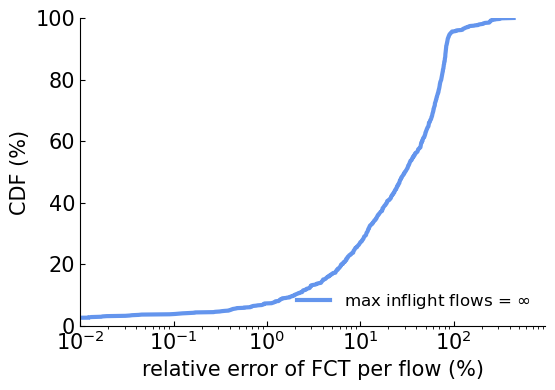

In [4]:
res_error_time=[]
res_error_sldn=[]
max_inflight_flows_list=[0]
dataset_str="_empirical"
flow_size_threshold=1000000
# dataset_str=""
legend_list=[f'max inflight flows = {max_inflight_flows}' if max_inflight_flows!=0 else f'max inflight flows = $\infty$' for max_inflight_flows in max_inflight_flows_list]
for max_inflight_flows in max_inflight_flows_list:
    data = np.load(f'./res/inference_{max_inflight_flows}_t{flow_size_threshold}{dataset_str}.npz')
    fct = data['fct']
    sldn = data['sldn']
    print(f"fct: {fct.shape}, sldn: {sldn.shape}")
    
    # Extract the data
    predicted_completion_times = fct[:, :, 0].flatten()
    actual_completion_times = fct[:, :, 1].flatten()
    predicted_sldns = sldn[:, :, 0].flatten()
    actual_sldns = sldn[:, :, 1].flatten()
    print('Predicted Completion Times:', predicted_completion_times.shape)
    # calculate the relative error
    relative_error_time = np.abs(actual_completion_times - predicted_completion_times) / actual_completion_times *100
    relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    res_error_time.append(relative_error_time)
    res_error_sldn.append(relative_error_sldn)
    print(f"max sldn = {np.max(actual_sldns)}, {np.max(predicted_sldns)}")
    print(f"mean error={np.mean(relative_error_time)}, {np.median(relative_error_sldn)}")
    print(f"p99 error")

fig_index=0
plot_cdf(
    res_error_sldn,
    None,
    legend_list,
    x_label="relative error of FCT per flow (%)",
    log_switch=True,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=1,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1



actual_sldns: (100000,), flowsim_sldns: (100000,)
actual_sldns: (100000,), predicted_sldns: (100000,)
size_list: (100000,)
fsize_total_per_flow: (100000,)
x: (5, 2, 2)
plot_res: (2, 5)
plot_res: (2, 5)


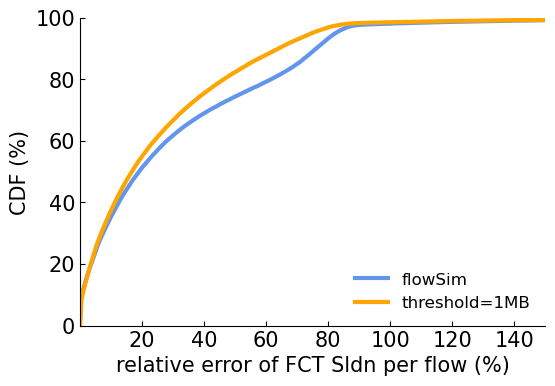

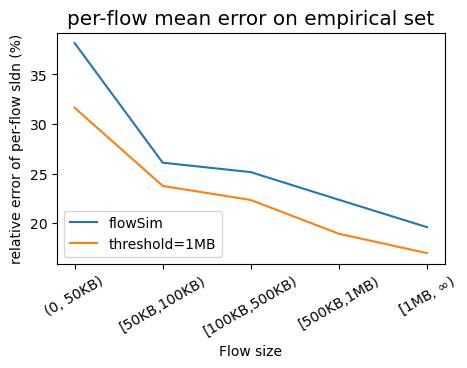

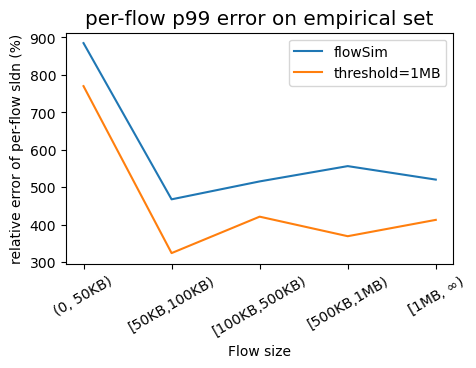

In [34]:
res_error_time=[]
res_error_sldn=[]
max_inflight_flows_list=[0]
dataset_str="_empirical"
# flow_size_threshold_list=[200000, 1000000, 100000000]
flow_size_threshold_list=[1000000]
# flow_size_threshold_list_label=["200KB", "1MB", "$\infty$"]
flow_size_threshold_list_label=["1MB"]
# dataset_str=""
legend_list=[f'max inflight flows = {max_inflight_flows}' if max_inflight_flows!=0 else f'max inflight flows = $\infty$' for max_inflight_flows in max_inflight_flows_list]

n_scenario=1
n_flows_up=100000
n_flows_low=0
size_list=[]
error_list=[]
legend_list=[]
fig_index=0
for flow_size_threshold_idx,flow_size_threshold in enumerate(flow_size_threshold_list):
    for max_inflight_flows in max_inflight_flows_list:
        data_m4 = np.load(f'./res/inference_path_{max_inflight_flows}_t{flow_size_threshold}{dataset_str}.npz')
        sldn = data_m4['sldn']
        predicted_sldns = sldn[:n_scenario, n_flows_low:n_flows_up, 0].squeeze()
        # actual_sldns = sldn[:, :, 1]
        
        if flow_size_threshold_idx==0:
            data_flowsim = np.load(f'./res/flowsim_path{dataset_str}.npy',allow_pickle=True)
            data_flowsim=np.array(data_flowsim[0]).astype(np.float32)
            size_list.append(data_flowsim[:n_scenario, 1, n_flows_low:n_flows_up])
            
            actual_sldns = data_flowsim[:n_scenario, 2, n_flows_low:n_flows_up].squeeze()
            flowsim_sldns=data_flowsim[:n_scenario, 0, n_flows_low:n_flows_up].squeeze()
            print(f"actual_sldns: {actual_sldns.shape}, flowsim_sldns: {flowsim_sldns.shape}")
            error_tmp=np.abs(actual_sldns - flowsim_sldns) / actual_sldns *100
            error_list.append(error_tmp)
            legend_list.append("flowSim")
        print(f"actual_sldns: {actual_sldns.shape}, predicted_sldns: {predicted_sldns.shape}")
        # calculate the relative error
        relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
        error_list.append(relative_error_sldn)
        legend_list.append(f"threshold={flow_size_threshold_list_label[flow_size_threshold_idx]}")
error_list=np.array(error_list)
size_list=np.array(size_list).squeeze()
plot_cdf(
    error_list,
    None,
    legend_list,
    x_label="relative error of FCT Sldn per flow (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1

print(f"size_list: {size_list.shape}")
fsize_total_per_flow=np.digitize(size_list.flatten(), balance_size_bins)
print(f"fsize_total_per_flow: {fsize_total_per_flow.shape}")
error_list=np.reshape(error_list, [error_list.shape[0], -1])
x=[]
for k in range(len(balance_size_bins_label)):
    target_idx=fsize_total_per_flow==k
    tmp=error_list[:, target_idx]  
    x.append([np.mean(tmp, axis=1), np.max(tmp, axis=1)])
x=np.array(x)
print(f"x: {x.shape}")

plot_res=x[:,0,:].squeeze().T
print(f"plot_res: {plot_res.shape}")
plt.figure(fig_index,figsize=(5, 3))
plt.title(f"per-flow mean error on {dataset_str[1:]} set", fontsize="x-large")
for i in range(len(plot_res)):
    plt.plot(plot_res[i], label=legend_list[i])
plt.xticks(ticks=np.arange(len(balance_size_bins_label)), labels=balance_size_bins_label,rotation=30)
plt.legend(loc="lower left")

plt.xlabel("Flow size")
plt.ylabel(f"relative error of per-flow sldn (%)")
# plt.axvline(x=6, color='r', linestyle='--')
# plt.axvline(x=7, color='b', linestyle='--')
# plt.axhline(y=50, color='k', linestyle='--')
# plt.text(0, 50, '50%', color='k')
# plt.axhline(y=10, color='k', linestyle='--')
# plt.text(0, 10, '10%', color='k')
# plt.yscale('log')
fig_index+=1

plot_res=x[:,1,:].squeeze().T
print(f"plot_res: {plot_res.shape}")
plt.figure(fig_index,figsize=(5, 3))
plt.title(f"per-flow p99 error on {dataset_str[1:]} set", fontsize="x-large")
for i in range(len(plot_res)):
    plt.plot(plot_res[i], label=legend_list[i])
plt.xticks(ticks=np.arange(len(balance_size_bins_label)), labels=balance_size_bins_label,rotation=30)
plt.legend()

plt.xlabel("Flow size")
plt.ylabel(f"relative error of per-flow sldn (%)")
# plt.axvline(x=6, color='r', linestyle='--')
# plt.axvline(x=7, color='b', linestyle='--')
# plt.axhline(y=50, color='k', linestyle='--')
# plt.text(0, 50, '50%', color='k')
# plt.axhline(y=10, color='k', linestyle='--')
# plt.text(0, 10, '10%', color='k')
# plt.yscale('log')
fig_index+=1